# 10.2.2: Intro to Machine Learning (Part 2)

###### 

##### Instructions. Use the dataset to perform a classification prediction using scikit-learn, as demonstrated in the lectures. You should split the data into test/train sets, train the model (output/comment the scores), cross validate the model (output/comment the scores), and predict using the test set (output/comment the scores and actual accuracy).

##### Research Question: TEST how each factor (i.e. direction) impacts whether selling price is greater than 500,000 USD or not: (1) Year (Year Bought [1992-2020]) / (2) Km Driven / (3) Engine / (4) Mileage / (5) MaxPower (Remove Categorical Columns for simplicity)

In [1]:
# Some Information about the Data:
# To be used for both classification and regression (Will transform a variable)
# (1) Source: Kaggle Vehicle Data Set (From Dekho) by Nehal Birla
# (2) Potential Dependent Variables: Selling Price, Selling Price Greater than USD 500,000
# (3) Potential Independent Variables (More than 3): Year (Year Bought [1992-2020]), Km Driven, Engine, Mileage, MaxPower (Remove Categorical Columns for simplicity)
# (4) Rows: 8,129

In [2]:
# Import packages for Winsorization
import scipy.stats.mstats
import matplotlib.pyplot as plt # multiple plots

# Read CSV File
import pandas as pd

carData = pd.read_csv('Car details v3.csv')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


### I. Data Cleaning (STEP 1)

#### * Other Steps

In [3]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['mileage'] = carData['mileage'].str.rstrip('km/kg kmpl') # don't forget km/kg
# carData.mileage.unique()
carData['mileage'] = pd.to_numeric(carData['mileage'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [4]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['engine'] = carData['engine'].str.rstrip(' CC')
carData['engine'] = pd.to_numeric(carData['engine'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
# Other Step: Remove units (mileage (kmpl), engine (CC), max_power (bhp)
# carData['mileage'] = carData['mileage'].map(lambda x: x.rstrip(' kmpl')) won't work with float?
# carData['mileage'] = carData['mileage'].map(lambda x: x*2) # concatenate
carData['max_power'] = carData['max_power'].str.rstrip(' bhp')
carData['max_power'] = pd.to_numeric(carData['max_power'], downcast='float')
carData

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


In [6]:
# Rename Columns (For Clarity/Neatness)
carData.columns = ['Car Name', 'Year Bought', 'Selling Price', 'KM Driven', 'Fuel Type', 'Seller Type', 'Transmission', 'Nth Owner', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)', 'Torque', 'N-Seater']
carData

,Car Name,Year Bought,Selling Price,KM Driven,Fuel Type,Seller Type,Transmission,Nth Owner,Mileage (km/litr),Engine (cc),Max Power (bhp),Torque,N-Seater
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


#### a. Drop Nulls

In [7]:
carData.dropna(inplace=True) # how=any, all, axis, thresh, inplace
carData # Lose 222 Observations

,Car Name,Year Bought,Selling Price,KM Driven,Fuel Type,Seller Type,Transmission,Nth Owner,Mileage (km/litr),Engine (cc),Max Power (bhp),Torque,N-Seater
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.400000,1248.0,74.000000,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.139999,1498.0,103.519997,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.700001,1497.0,78.000000,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.000000,1396.0,90.000000,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.100000,1298.0,88.199997,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.500000,1197.0,82.849998,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.799999,1493.0,110.000000,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.299999,1248.0,73.900002,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.570000,1396.0,70.000000,140Nm@ 1800-3000rpm,5.0


#### b. Remove irrelevant columns

In [8]:
carData.drop(['Torque', 'Fuel Type', 'Seller Type', 'Transmission', 'Nth Owner', 'N-Seater'], axis = 1, inplace = True)
carData

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000
8125,Maruti Swift Dzire ZDi,2009,382000,120000,19.299999,1248.0,73.900002
8126,Tata Indigo CR4,2013,290000,25000,23.570000,1396.0,70.000000


#### e. Remove duplicates

In [9]:
# Remove Duplicates here in the data set that is about to be the final one:
## I noticed one entry to be a duplicate:
##  8126	Tata Indigo CR4	2013	290000	25000	23.57	1396	70
##  8127	Tata Indigo CR4	2013	290000	25000	23.57	1396	70

carData.drop_duplicates(inplace = True)
carData # Shed 1197 observations

,Car Name,Year Bought,Selling Price,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,23.400000,1248.0,74.000000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,21.139999,1498.0,103.519997
2,Honda City 2017-2020 EXi,2006,158000,140000,17.700001,1497.0,78.000000
3,Hyundai i20 Sportz Diesel,2010,225000,127000,23.000000,1396.0,90.000000
4,Maruti Swift VXI BSIII,2007,130000,120000,16.100000,1298.0,88.199997
...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,18.900000,998.0,67.099998
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,22.540001,1396.0,88.730003
8123,Hyundai i20 Magna,2013,320000,110000,18.500000,1197.0,82.849998
8124,Hyundai Verna CRDi SX,2007,135000,119000,16.799999,1493.0,110.000000


#### (*) f. Add Binary Variable where it is TRUE if Selling Price > 500,000 or FALSE if NOT

In [10]:
carData['Greater Than 500,000'] = carData['Selling Price'] > 500000
carData.drop(['Selling Price', 'Car Name'], axis = 1, inplace = True) # Remove also car names so that in the classification below, won't calculate importance for this
# carData.mileage.unique()
carData

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


In [11]:
# Summary Statistics
# carData['Greater Than 500,000'].unique()
carData['Greater Than 500,000'].describe() # False = 4089, True = 2620

count      6709
unique        2
top       False
freq       4089
Name: Greater Than 500,000, dtype: object

### II. Classification Prediction (STEP 2)

#### EXPLORATORY DATA ANALYSIS: Other Adjustments + Preliminary Charting

In [12]:
# Recall -- Verdict: Be sure to WINSORIZE the following
# (1) Mileage [0 value] 
# (2) KM Driven [1 km / 2m km]
# (3) Selling Value [Some really high selling values of (1.2m and absurdly low sales of 30k)]

In [13]:
# Decision Rule: If it looks normal, don't clean anymore.

In [14]:
############## Quick Scatter Plots ##############

In [15]:
# Can't do plotting with a T/F Variable

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

# carData.plot('Year Bought', 'Greater Than 500,000', kind='scatter', ax=axes[0], color='red')
# carData.plot('KM Driven', 'Greater Than 500,000', kind='scatter', ax=axes[1], color='violet')
# carData.plot('Mileage (km/litr)', 'Greater Than 500,000', kind='scatter', ax=axes[2], color='green')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
# carData.plot('Engine (cc)', 'Greater Than 500,000', kind='scatter', ax=axes[0], color='blue')
# carData.plot('Max Power (bhp)', 'Greater Than 500,000', kind='scatter', ax=axes[1], color='black')

In [16]:
# Verdict: Year Bought, Max Power and Engine don't seem to be too continuous, but since this is just a practice regression this will have to do.
# Result looks LOGICAL (e.g. earlier bought, higher selling price, etc.)

In [17]:
############## Mileage ##############

In [18]:
# Winsorize Mileage:
carDataWinsorized = carData.copy()
carDataWinsorized["Mileage (km/litr)"] = scipy.stats.mstats.winsorize(carDataWinsorized["Mileage (km/litr)"], [.05, .05])

carDataWinsorized

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


In [19]:
# REMOVE OUTLIERS:
valMin = carData["Mileage (km/litr)"].quantile(0.05)
valMax = carData["Mileage (km/litr)"].quantile(0.95)
carDataNoOutliers = carData[carData["Mileage (km/litr)"].between(valMin, valMax)]

carDataNoOutliers

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


<AxesSubplot:>

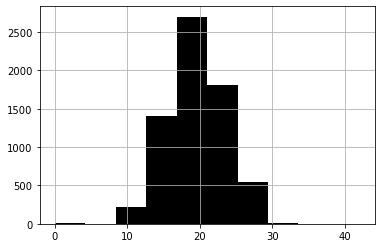

In [20]:
# Chart to see difference: (unwinsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carData["Mileage (km/litr)"].hist(bins=10, color='black')
# carData.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1]) # Outlier isn't doing much to affect what looks like a downtrend

<AxesSubplot:>

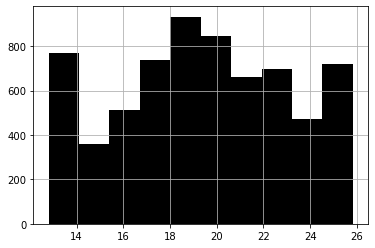

In [21]:
# Chart to see difference: (winsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataWinsorized["Mileage (km/litr)"].hist(bins=10, color='black')
# carDataWinsorized.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:>

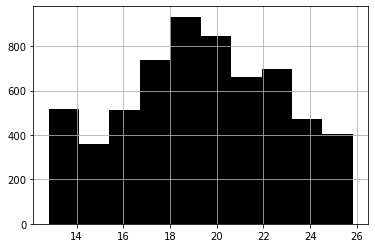

In [22]:
# Chart to see difference: (Removed)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataNoOutliers["Mileage (km/litr)"].hist(bins=10, color='black')
# carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

In [23]:
# Can't do plotting with a T/F Variable
# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

# carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
# carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
# carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
# carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
# carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [24]:
# Effect of clean up: Scatterplots look a bit more better distributed but the results are still the same. 
# DECISION: I decide not to transform the data anymore and stick with what I have because the outliers, once removed, appear not to have much impact to the existing relationship.

In [25]:
############## KM Driven ##############

In [26]:
# Winsorize KM Driven:
carDataWinsorized = carData.copy()
carDataWinsorized["KM Driven"] = scipy.stats.mstats.winsorize(carDataWinsorized["KM Driven"], [.05, .05])

carDataWinsorized

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


In [27]:
# REMOVE OUTLIERS:
valMin = carData["KM Driven"].quantile(0.05)
valMax = carData["KM Driven"].quantile(0.95)
carDataNoOutliers = carData[carData["KM Driven"].between(valMin, valMax)]

carDataNoOutliers

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


<AxesSubplot:>

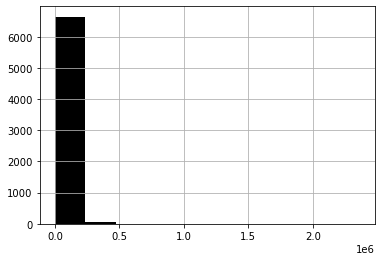

In [28]:
# Chart to see difference: (unwinsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carData["KM Driven"].hist(bins=10, color='black')
# carData.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:>

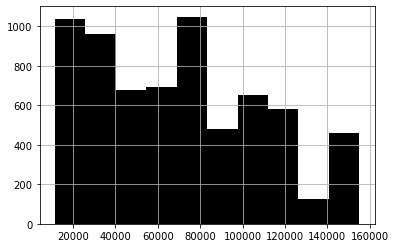

In [29]:
# Chart to see difference: (winsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataWinsorized["KM Driven"].hist(bins=10, color='black')
# carDataWinsorized.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

<AxesSubplot:>

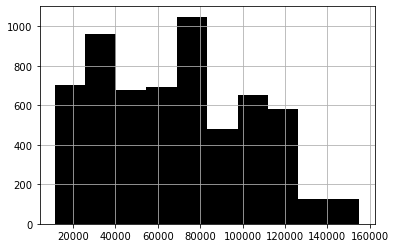

In [30]:
# Chart to see difference: (Removed)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))

carDataNoOutliers["KM Driven"].hist(bins=10, color='black')
# carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', color='pink', ax=axes[1])

In [31]:
# Can't do plotting with a T/F Variable

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

# carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
# carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
# carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
# carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
# carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [32]:
# Effect of clean up: Relationships remain the same. FLATTER relationship between KM (Removing 1km and 2km outliers were a big deal) and Selling Price.
# DECISION: MAKE THIS CHANGE FOR THE FINAL RUNS.

In [33]:
############## 'Greater Than 500,000' Price ##############
# UNABLE TO DO EDA with a TRUE/FALSE VARIABLE.
# Go STRAIGHT to Classification.

In [34]:
# Winsorize 'Greater Than 500,000':
# carDataWinsorized = carData.copy()
# carDataWinsorized['Greater Than 500,000'] = scipy.stats.mstats.winsorize(carDataWinsorized['Greater Than 500,000'], [.05, .05])

# carDataWinsorized

In [35]:
# REMOVE OUTLIERS (Nonsense):
# valMin = carData['Greater Than 500,000'].quantile(0.05)
# valMax = carData['Greater Than 500,000'].quantile(0.95)
# carDataNoOutliers = carData[carData['Greater Than 500,000'].between(valMin, valMax)]

# carDataNoOutliers

In [36]:
# Nonsense
# Chart to see difference: (unwinsorized)
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,4))
# carData['Greater Than 500,000'].hist(bins=10, color='black')

In [37]:
# Nonsense
# Chart to see difference: (winsorized)
# carDataWinsorized['Greater Than 500,000'].hist(bins=10, color='black')

In [38]:
# Nonsense
# Chart to see difference: (Removed)
# carDataNoOutliers['Greater Than 500,000'].hist(bins=10, color='black')

In [39]:
# Can't do plotting with a T/F Variable

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

# carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
# carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
# carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
# carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
# carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [40]:
# Effect of clean up: NA
# DECISION: NA
# LOGIC for order: NA

# PREFERENCE: NA

### Classification Prediction

In [41]:
# Final Data
# REMOVE OUTLIERS for Selling Price:
# valMin = carData["Selling Price"].quantile(0.05)
# valMax = carData["Selling Price"].quantile(0.95)
# carDataNoOutliers = carData[carData["Selling Price"].between(valMin, valMax)]

# carDataNoOutliers

In [42]:
# Final Data
# REMOVE OUTLIERS for KM Driven:
valMin = carData["KM Driven"].quantile(0.05)
valMax = carData["KM Driven"].quantile(0.95)
carDataNoOutliers = carData[carData["KM Driven"].between(valMin, valMax)]

carDataNoOutliers

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


In [43]:
# REMOVE OUTLIERS for Mileage (km/litr):
valMin = carDataNoOutliers["Mileage (km/litr)"].quantile(0.05)
valMax = carDataNoOutliers["Mileage (km/litr)"].quantile(0.95)
carDataNoOutliers = carDataNoOutliers[carDataNoOutliers["Mileage (km/litr)"].between(valMin, valMax)]

carDataNoOutliers

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000"
0,2014,145500,23.400000,1248.0,74.000000,False
1,2014,120000,21.139999,1498.0,103.519997,False
2,2006,140000,17.700001,1497.0,78.000000,False
3,2010,127000,23.000000,1396.0,90.000000,False
4,2007,120000,16.100000,1298.0,88.199997,False
...,...,...,...,...,...,...
8121,2013,50000,18.900000,998.0,67.099998,False
8122,2014,80000,22.540001,1396.0,88.730003,False
8123,2013,110000,18.500000,1197.0,82.849998,False
8124,2007,119000,16.799999,1493.0,110.000000,False


In [44]:
# Result: From 6709 Obs to 5486. A bit costly (1223 Obs Omitted)

In [45]:
# Final Data Scatter

In [46]:
# Can't do plotting with a T/F Variable

# fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28,5))

# carDataNoOutliers.plot('Year Bought', 'Selling Price', kind='scatter', ax=axes[0], color='red')
# carDataNoOutliers.plot('KM Driven', 'Selling Price', kind='scatter', ax=axes[1], color='violet')
# carDataNoOutliers.plot('Mileage (km/litr)', 'Selling Price', kind='scatter', ax=axes[2], color='green')

# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16.35,4.4))
# carDataNoOutliers.plot('Engine (cc)', 'Selling Price', kind='scatter', ax=axes[0], color='blue')
# carDataNoOutliers.plot('Max Power (bhp)', 'Selling Price', kind='scatter', ax=axes[1], color='black')

In [47]:
# Data looks cleaner and ready to regress.
# Prediction results won't be as reliable given apparent categoricalness in the data as can be seen after the final transformations.
# A bit concerned that Mileage may have a positive relationship with selling price if we do a one-to-one regression.

# Might be better to resample and bootstrap but I choose to preserve the data integrity for simplicity.

### Scikit Learn

In [48]:
# Summary Statistics: (Already Done in 10_1_1)
carDataNoOutliers.describe()

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
count,5486.000000,5486.000000,5486.000000,5486.000000,5486.000000
mean,2013.522785,68383.898833,19.598150,1382.246216,85.680740
std,3.785272,34423.077288,3.282856,443.902008,29.415192
min,1994.000000,11500.000000,12.990000,624.000000,34.200001
25%,2011.000000,40000.000000,17.010000,1196.000000,67.099998
50%,2014.000000,67000.000000,19.670000,1248.000000,81.830002
75%,2016.000000,93248.250000,22.320000,1498.000000,98.599998
max,2020.000000,155000.000000,26.000000,2993.000000,282.000000


In [49]:
# Classification:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, f1_score, r2_score
from sklearn.linear_model import LinearRegression

num_cols = ['Year Bought', 'KM Driven', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)'] # No change. Same with before.
cat_cols = []

# Pipeline of transforms with a final estimator.
# Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.
# The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # Standardize (The transform)
    ])

# A ONE HOT ENCODING is a representation of categorical variables as binary vectors [1,0].
# This first requires that the categorical values be mapped to integer values.
# Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
pipeline = ColumnTransformer([ # Applies transformers to columns of an array or pandas DataFrame.
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols # a join
y_col = ['Greater Than 500,000']

# forest_rgr = LinearRegression()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(carDataNoOutliers[all_x_cols], carDataNoOutliers[y_col], test_size=0.33) # Same with Reg

In [51]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train) # transform using mean and variance of TRAINING data
X_test_xformed = pipeline.transform(X_test) # transform using mean and variance of TEST data

# forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel()) # Regression Object (takes in X and Y)
forest_clf = RandomForestClassifier(**{'random_state':42, 'n_estimators':50, 'max_depth':16}) # ** signifies parameters
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

forest_clf = forest_clf.fit(X_train_xformed, y_train.values.ravel())

In [52]:
# Predict!

print('Train Scores')
train_pred = forest_clf.predict(X_train_xformed)

print(f'Precision Score: {precision_score(y_train.values.ravel(), train_pred):.2f}')
print(f'Recall Score: {recall_score(y_train.values.ravel(), train_pred):.2f}')
print(f'F1 Score: {f1_score(y_train.values.ravel(), train_pred):.2f}')

print('\nTest Scores')
test_pred = forest_clf.predict(X_test_xformed)

print(f'Precision Score: {precision_score(y_test.values.ravel(), test_pred):.2f}')
print(f'Recall Score: {recall_score(y_test.values.ravel(), test_pred):.2f}')
print(f'F1 Score: {f1_score(y_test.values.ravel(), test_pred):.2f}')

Train Scores
Precision Score: 0.99
Recall Score: 0.99
F1 Score: 0.99

Test Scores
Precision Score: 0.90
Recall Score: 0.88
F1 Score: 0.89


In [53]:
forest_clf.predict_proba(X_test_xformed)

array([[0.        , 1.        ],
       [0.84146154, 0.15853846],
       [1.        , 0.        ],
       ...,
       [0.46      , 0.54      ],
       [0.02      , 0.98      ],
       [0.98      , 0.02      ]])

In [54]:
x_train = pipeline.transform(carDataNoOutliers[all_x_cols]) # looks the same as before but IS NOT
y_train = carDataNoOutliers[y_col] # looks the same as before but IS NOT

train_pred = cross_val_predict(forest_clf, x_train, y_train.values.ravel(), cv=10) # Will take too long if you use too many, so just use cv=# per lecture. NOT LIKE Regression.
    
print(f'Precision Score: {precision_score(y_train.values.ravel(), train_pred):.2f}')
print(f'Recall Score: {recall_score(y_train.values.ravel(), train_pred):.2f}')

y_scores = cross_val_predict(forest_clf, x_train, y_train.values.ravel(), cv=5, method='predict_proba')
print(f'ROC AUC Score: {roc_auc_score(y_train.values.ravel(), y_scores[:, 1]):.2f}')

Precision Score: 0.88
Recall Score: 0.88
ROC AUC Score: 0.97


In [55]:
importances = forest_clf.feature_importances_
feature_names = carDataNoOutliers.columns
print(dict(zip(feature_names, importances)))

{'Year Bought': 0.31062245277534933, 'KM Driven': 0.11749678178204888, 'Mileage (km/litr)': 0.11938105270092009, 'Engine (cc)': 0.15160626934767746, 'Max Power (bhp)': 0.30089344339400426}


In [56]:
predictData = pd.DataFrame({'Year Bought':[2015], 'KM Driven':[100000], 'Mileage (km/litr)':[20], 'Engine (cc)':[2000], 'Max Power (bhp)':[100]})
display(predictData)

print(f'Can Resell at a Price Greater than USD 500,000? : {bool(forest_clf.predict(pipeline.transform(predictData))[0])}')

# Results (Adjust all inputs):
# (1) Increase 'KM Driven' by 100,000 to 200,000: Still TRUE
# (2) Increase 'Year Bought' by 1 to 2016: Still TRUE
# (3) Decrease 'Mileage (km/litr)' or Efficiency to 15: Still TRUE
# (4) Decrease 'Engine (cc)' to 1500: Still TRUE
# (5) Decrease 'Max Power (bhp)' to 50: NOW FALSE. Also highly sensitive to bhp....

# And all of these are statistically significant with good model precision scores. 
# BUT, Have to test for spurious relationship however as the scores look a bit too high at 0.88.

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,2015,100000,20,2000,100


Can Resell at a Price Greater than USD 500,000? : True


### Extra Section: Using Bootstrapped Data:

In [57]:
def bootstrapper(nBs, dataset):
    '''
    Input (1) Number of Bootstraps and (2) Dataset name, and the function will bootstrap the dataset for the given number of bootstraps
    '''
    
    bs = dataset.sample(n=len(dataset)*nBs, replace=True, axis=0).reset_index().drop('index', axis=1)
    bs['nBs'] = (bs.index/len(dataset)).astype(int)
    return bs

In [58]:
bs = bootstrapper(2000, carData) # Computer unable to handle anymore
bs

,Year Bought,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp),"Greater Than 500,000",nBs
0,2012,90000,15.420000,1405.0,70.000000,False,0
1,1997,80000,16.100000,796.0,37.000000,False,0
2,2017,80000,17.799999,1198.0,86.699997,False,0
3,2014,100000,19.100000,1197.0,85.800003,False,0
4,2018,6000,18.600000,1197.0,81.830002,True,0
...,...,...,...,...,...,...,...
13417995,2017,50000,18.900000,1197.0,81.860001,True,1999
13417996,2016,28180,23.650000,1248.0,88.500000,True,1999
13417997,2012,60000,22.900000,1248.0,74.000000,False,1999
13417998,2017,34000,21.040001,1461.0,83.800003,True,1999


In [59]:
# Create Bootstrapped Data Frame
bsData = pd.DataFrame(dtype=float)
# bsData['Year Bought'] = bs.groupby('nBs').mean()['Year Bought'].round() # Mean value = bootstrap value for each observation
bsData['Greater Than 500,000'] = bs.groupby('nBs').mean()['Greater Than 500,000'] # Mean value = bootstrap value for each observation
bsData['KM Driven'] = bs.groupby('nBs').mean()['KM Driven'] # Mean value = bootstrap value for each observation
bsData['Mileage (km/litr)'] = bs.groupby('nBs').mean()['Mileage (km/litr)'] # Mean value = bootstrap value for each observation
bsData['Engine (cc)'] = bs.groupby('nBs').mean()['Engine (cc)'] # Mean value = bootstrap value for each observation
bsData['Max Power (bhp)'] = bs.groupby('nBs').mean()['Max Power (bhp)'] # Mean value = bootstrap value for each observation

bsData = bsData.reset_index() # Remove Year Bought as no variation is available (mainly 2014)
del bsData['nBs'] # Delete this extra column set
bsData

,"Greater Than 500,000",KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,0.391265,72531.403935,19.459742,1431.143066,87.869759
1,0.383813,72113.263825,19.477924,1427.917847,87.570541
2,0.393799,73663.733045,19.404181,1436.220337,88.230324
3,0.388732,73379.404531,19.483423,1425.357422,87.450584
4,0.396333,73076.466985,19.473600,1428.695435,88.005859
...,...,...,...,...,...
1995,0.387986,73156.835743,19.425583,1433.472046,87.883438
1996,0.395886,72221.249068,19.448074,1426.571899,87.541901
1997,0.379192,74296.234610,19.369186,1440.158569,87.784088
1998,0.383664,73587.730809,19.482851,1427.003418,87.174454


In [60]:
# Modify Further by adding a column with random choice parameter based on weight in Greater Than 500,000 to generate T/F values:
## Set up
from numpy.random import choice
import numpy as np

np.random.seed(8) # set seed

weightList = list(bsData['Greater Than 500,000'])
weightList

tfList = list(map(lambda x: choice([1, 0], 1, p=[x, 1-x]).tolist(), weightList)) # Need to get 0/1, then convert to bool
tfList = [item for sublist in tfList for item in sublist] # flatten
len(tfList)

# Append to bsData (via overrwrite):
bsData['Greater Than 500,000'] = tfList

# Show final data set
bsData['Greater Than 500,000'] = bsData['Greater Than 500,000'].astype('bool') # Need to set as bool or classification won't work
bsData

,"Greater Than 500,000",KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,False,72531.403935,19.459742,1431.143066,87.869759
1,False,72113.263825,19.477924,1427.917847,87.570541
2,False,73663.733045,19.404181,1436.220337,88.230324
3,False,73379.404531,19.483423,1425.357422,87.450584
4,True,73076.466985,19.473600,1428.695435,88.005859
...,...,...,...,...,...
1995,False,73156.835743,19.425583,1433.472046,87.883438
1996,False,72221.249068,19.448074,1426.571899,87.541901
1997,True,74296.234610,19.369186,1440.158569,87.784088
1998,False,73587.730809,19.482851,1427.003418,87.174454


In [61]:
bsData.dtypes

Greater Than 500,000       bool
KM Driven               float64
Mileage (km/litr)       float32
Engine (cc)             float32
Max Power (bhp)         float32
dtype: object

In [62]:
bsData['Greater Than 500,000'].value_counts()

False    1232
True      768
Name: Greater Than 500,000, dtype: int64

In [63]:
# Classification Proper:

num_cols = ['KM Driven', 'Mileage (km/litr)', 'Engine (cc)', 'Max Power (bhp)'] # No change. Same with before.
cat_cols = []

# Pipeline of transforms with a final estimator.
# Sequentially apply a list of transforms and a final estimator. Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods.
# The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # Standardize (The transform)
    ])

# A ONE HOT ENCODING is a representation of categorical variables as binary vectors [1,0].
# This first requires that the categorical values be mapped to integer values.
# Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
pipeline = ColumnTransformer([ # Applies transformers to columns of an array or pandas DataFrame.
        ('num', num_pipeline, num_cols), 
        ('cat', OneHotEncoder(), cat_cols)
    ])

all_x_cols = num_cols + cat_cols # a join
y_col = ['Greater Than 500,000']

# forest_rgr = LinearRegression()

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bsData[all_x_cols], bsData[y_col], test_size=0.33) # Same with Reg

In [65]:
# Train!

X_train_xformed = pipeline.fit_transform(X_train) # transform using mean and variance of TRAINING data
X_test_xformed = pipeline.transform(X_test) # transform using mean and variance of TEST data

# forest_rgr = forest_rgr.fit(X_train_xformed, y_train.values.ravel()) # Regression Object (takes in X and Y)
forest_clf = RandomForestClassifier(**{'random_state':42, 'n_estimators':50, 'max_depth':16}) # ** signifies parameters
# The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

forest_clf = forest_clf.fit(X_train_xformed, y_train.values.ravel())

In [66]:
# Predict!

print('Train Scores')
train_pred = forest_clf.predict(X_train_xformed)

print(f'Precision Score: {precision_score(y_train.values.ravel(), train_pred):.2f}')
print(f'Recall Score: {recall_score(y_train.values.ravel(), train_pred):.2f}')
print(f'F1 Score: {f1_score(y_train.values.ravel(), train_pred):.2f}')

print('\nTest Scores')
test_pred = forest_clf.predict(X_test_xformed)

print(f'Precision Score: {precision_score(y_test.values.ravel(), test_pred):.2f}')
print(f'Recall Score: {recall_score(y_test.values.ravel(), test_pred):.2f}')
print(f'F1 Score: {f1_score(y_test.values.ravel(), test_pred):.2f}')

Train Scores
Precision Score: 1.00
Recall Score: 0.98
F1 Score: 0.99

Test Scores
Precision Score: 0.44
Recall Score: 0.18
F1 Score: 0.25


In [67]:
forest_clf.predict_proba(X_test_xformed)

array([[0.308     , 0.692     ],
       [0.63419219, 0.36580781],
       [0.60037086, 0.39962914],
       ...,
       [0.82010637, 0.17989363],
       [0.81463496, 0.18536504],
       [0.43604567, 0.56395433]])

In [68]:
x_train = pipeline.transform(bsData[all_x_cols]) # looks the same as before but IS NOT
y_train = bsData[y_col] # looks the same as before but IS NOT

train_pred = cross_val_predict(forest_clf, x_train, y_train.values.ravel(), cv=10) # Will take too long if you use too many, so just use cv=# per lecture. NOT LIKE Regression.
    
print(f'Precision Score: {precision_score(y_train.values.ravel(), train_pred):.2f}')
print(f'Recall Score: {recall_score(y_train.values.ravel(), train_pred):.2f}')

y_scores = cross_val_predict(forest_clf, x_train, y_train.values.ravel(), cv=5, method='predict_proba')
print(f'ROC AUC Score: {roc_auc_score(y_train.values.ravel(), y_scores[:, 1]):.2f}')

Precision Score: 0.41
Recall Score: 0.18
ROC AUC Score: 0.49


In [69]:
importances = forest_clf.feature_importances_
feature_names = bsData.columns
print(dict(zip(feature_names, importances)))

# Increase in importances after removing years bought (cannot place this as bootstrapping removes the variation in the variable (all 2014))

{'Greater Than 500,000': 0.26726739267271166, 'KM Driven': 0.2549659125455802, 'Mileage (km/litr)': 0.23824176186972057, 'Engine (cc)': 0.2395249329119876}


In [70]:
predictData = pd.DataFrame({'KM Driven':[100000], 'Mileage (km/litr)':[20], 'Engine (cc)':[2000], 'Max Power (bhp)':[100]})
display(predictData)

print(f'Can Resell at a Price Greater than USD 500,000? : {bool(forest_clf.predict(pipeline.transform(predictData))[0])}')

# Results (Adjust all inputs):
# (1) Increase 'KM Driven' by 100,000 to 200,000: Still TRUE
# (2) Decrease 'Mileage (km/litr)' or Efficiency to 15: FALSE
# (3) Decrease 'Engine (cc)' to 1500: Still TRUE
# (4) Decrease 'Max Power (bhp)' to 50: Still TRUE # CHANGE IN RESULT!

# LOW TEST VALIDITY of MODEL after removing years bought and others due to BOOTSTRAPPING EFFECTS.
# And all of these are statistically significant with good model precision scores. BUT LOWER vs non-bootstrapped. 
# Relationships still hold despite dropping 'Years Bought' variable, except for Decrease in Max Power which now has a negative relationship (i.e. decrease in Max Power increases likelihood of x>500k).
# CAVEAT: (1) We have less data here however, and lower data validation scores, (2) Only used a WORKAROUND for t/f variable

,KM Driven,Mileage (km/litr),Engine (cc),Max Power (bhp)
0,100000,20,2000,100


Can Resell at a Price Greater than USD 500,000? : True
